### 2. Nicht linear Gleichungen und Gleichungssysteme
Main source: http://docs.sympy.org/latest/modules/solvers/solveset.html#nonlinsolve
Übungen: http://www.iks.hs-merseburg.de/~eliebsch/lehre/Vlm3infa2.pdf


In [1]:
from sympy import *
init_printing()

We define the symbols and the system of equations (which we took from the SymPy website):

In [3]:
x,y=symbols("x y")

In [7]:
system=[x*y-1,4*x**2+y**2-5];
symbols=[x,y]

system

nonlinsolve() takes as inputs the system of equations and the symbols:

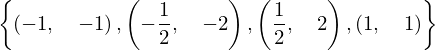

In [8]:
nonlinsolve(system,symbols)